In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/cleaned_used_car_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           4009 non-null   object 
 1   milage          4009 non-null   int64  
 2   fuel_type       4009 non-null   object 
 3   transmission    4009 non-null   object 
 4   ext_col         4009 non-null   object 
 5   int_col         4009 non-null   object 
 6   accident        4009 non-null   object 
 7   clean_title     4009 non-null   object 
 8   price           4009 non-null   int64  
 9   car_age         4009 non-null   int64  
 10  horsepower      3201 non-null   float64
 11  engine_size     3632 non-null   float64
 12  cylinder_count  3064 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 407.3+ KB


In [4]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,car_age,horsepower,engine_size,cylinder_count
0,Ford,51000,E85 Flex Fuel,Automatic,Black,Black,Accident reported,Yes,10300,12,300.0,3.7,6.0
1,Hyundai,34742,Gasoline,Automatic,Other,Grey,Accident reported,Yes,38005,4,NaN,3.8,NaN
2,Lexus,22372,Gasoline,Automatic,Blue,Black,None reported,Unknown,54598,3,NaN,NaN,NaN
3,INFINITI,88900,Hybrid,Automatic,Black,Black,None reported,Yes,15500,10,354.0,3.5,6.0
4,Audi,9835,Gasoline,Automatic,White,Black,None reported,Unknown,34999,4,NaN,2.0,NaN


* **_Numerical columns_** : 'milage', 'car_age', 'horsepower', 'engine_size', 'cylinder_count'
* **_Categorical columns_** : 'brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'

In [5]:
# df['brand'].value_counts()

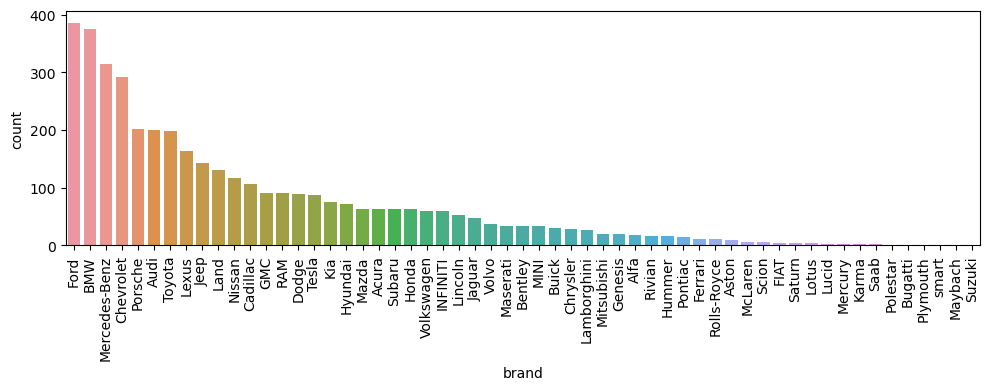

In [6]:
plt.figure(figsize=(10,4),layout='tight')
sns.barplot(x=df['brand'].value_counts().index,y=df['brand'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [7]:
car_in = df['brand'].value_counts()[df['brand'].value_counts()>30].index
df['brand'] = df['brand'].apply(lambda x: x if x in car_in else 'Other')

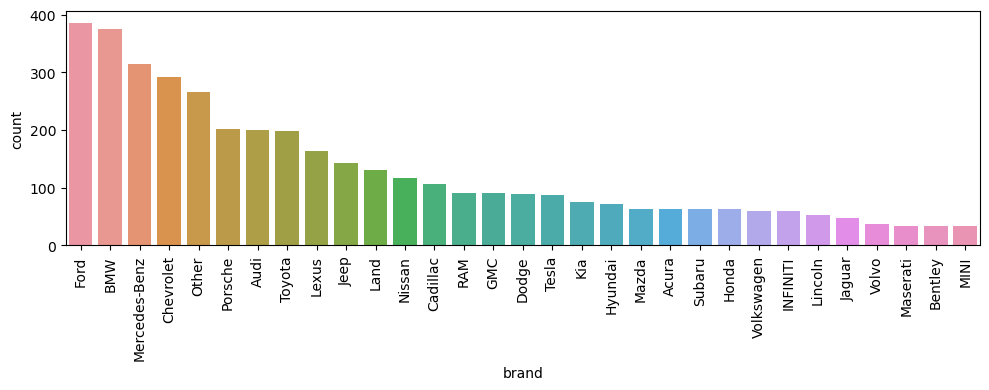

In [8]:
plt.figure(figsize=(10,4),layout='tight')
sns.barplot(x=df['brand'].value_counts().index,y=df['brand'].value_counts())
plt.xticks(rotation=90)
plt.show()

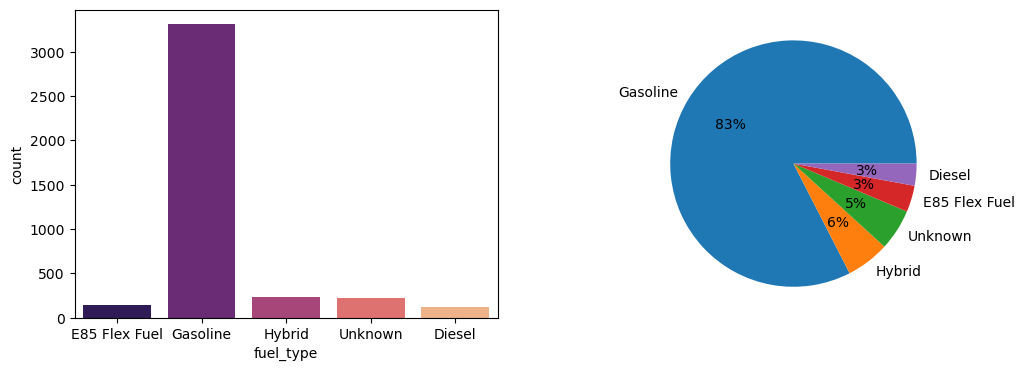

In [9]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x=df['fuel_type'],ax=axis[0],palette="magma")
axis[1].pie(x=df['fuel_type'].value_counts(),labels=df['fuel_type'].value_counts().index,autopct="%.0f%%")
plt.show()

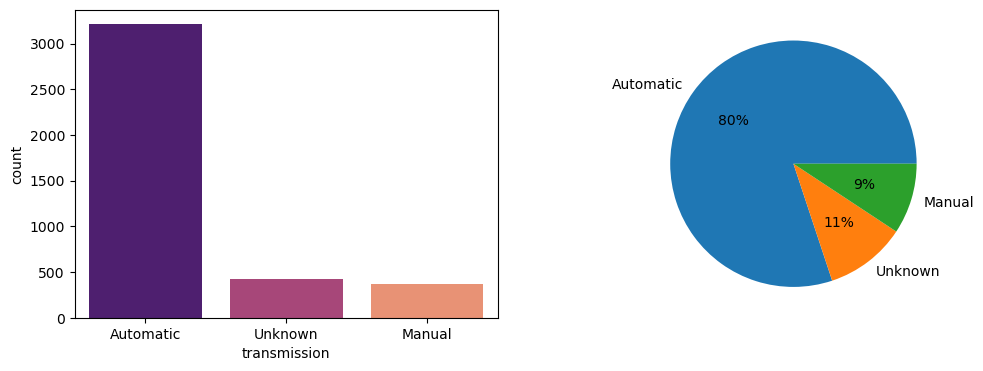

In [10]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x=df['transmission'],ax=axis[0],palette="magma")
axis[1].pie(x=df['transmission'].value_counts(),labels=df['transmission'].value_counts().index,autopct="%.0f%%")
plt.show()

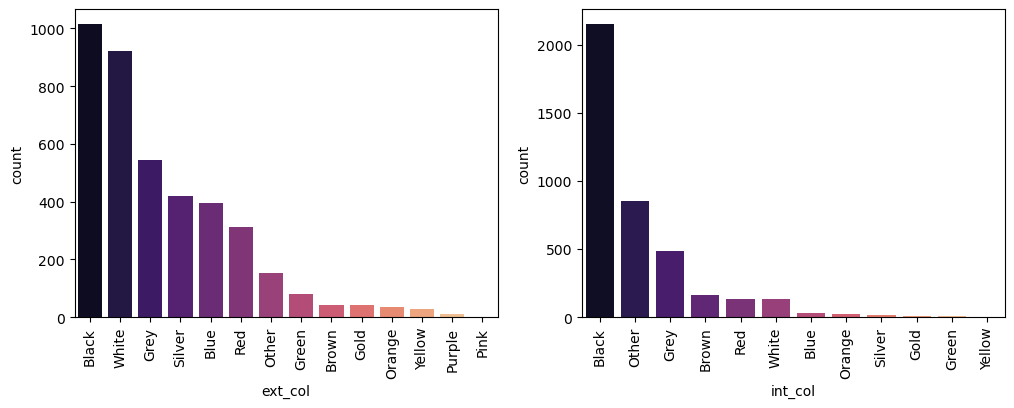

In [11]:
fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.barplot(x=df['ext_col'].value_counts().index,y=df['ext_col'].value_counts(),palette="magma",ax=axis[0])
sns.barplot(x=df['int_col'].value_counts().index,y=df['int_col'].value_counts(),palette="magma",ax=axis[1])
axis[0].tick_params(axis='x', rotation=90)
axis[1].tick_params(axis='x', rotation=90)
plt.show()

In [12]:
ext_col_in = df['ext_col'].value_counts()[df['ext_col'].value_counts()>=30].index
df['ext_col'] = df['ext_col'].apply(lambda x: x if x in ext_col_in else 'Other')

In [13]:
int_col_in = df['int_col'].value_counts()[df['int_col'].value_counts()>=30].index
df['int_col'] = df['int_col'].apply(lambda x: x if x in int_col_in else 'Other')

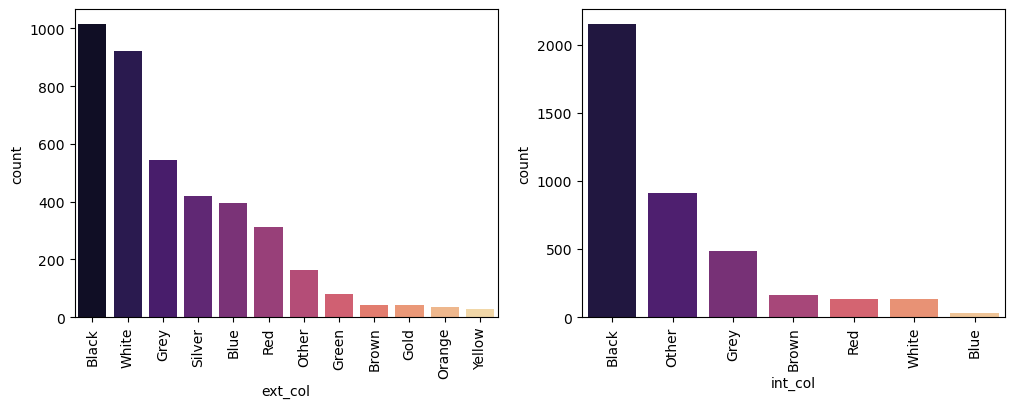

In [14]:
fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.barplot(x=df['ext_col'].value_counts().index,y=df['ext_col'].value_counts(),palette="magma",ax=axis[0])
sns.barplot(x=df['int_col'].value_counts().index,y=df['int_col'].value_counts(),palette="magma",ax=axis[1])
axis[0].tick_params(axis='x', rotation=90)
axis[1].tick_params(axis='x', rotation=90)
plt.show()

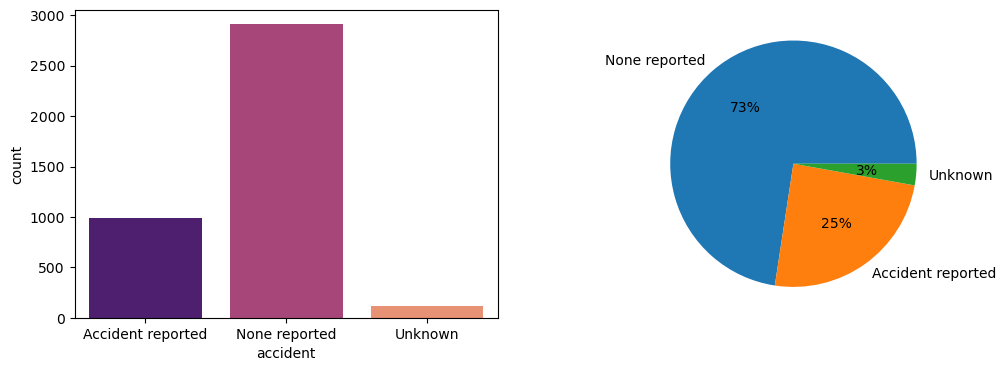

In [15]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x=df['accident'],ax=axis[0],palette="magma")
axis[1].pie(x=df['accident'].value_counts(),labels=df['accident'].value_counts().index,autopct="%.0f%%")
plt.show()

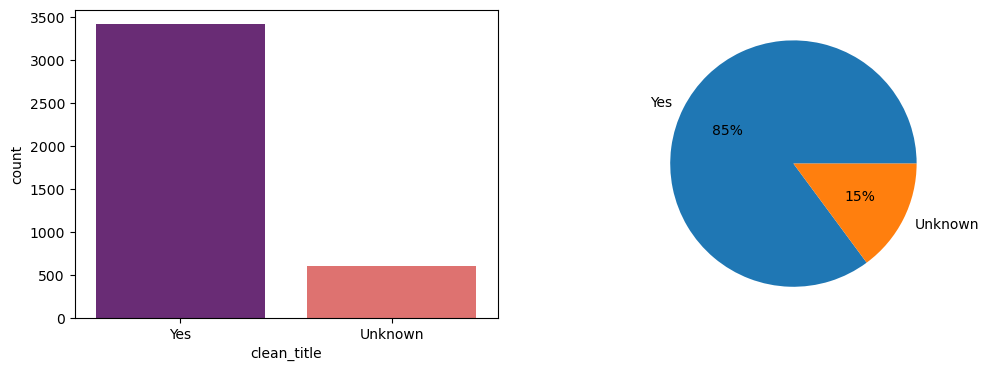

In [16]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x=df['clean_title'],ax=axis[0],palette="magma")
axis[1].pie(x=df['clean_title'].value_counts(),labels=df['clean_title'].value_counts().index,autopct="%.0f%%")
plt.show()

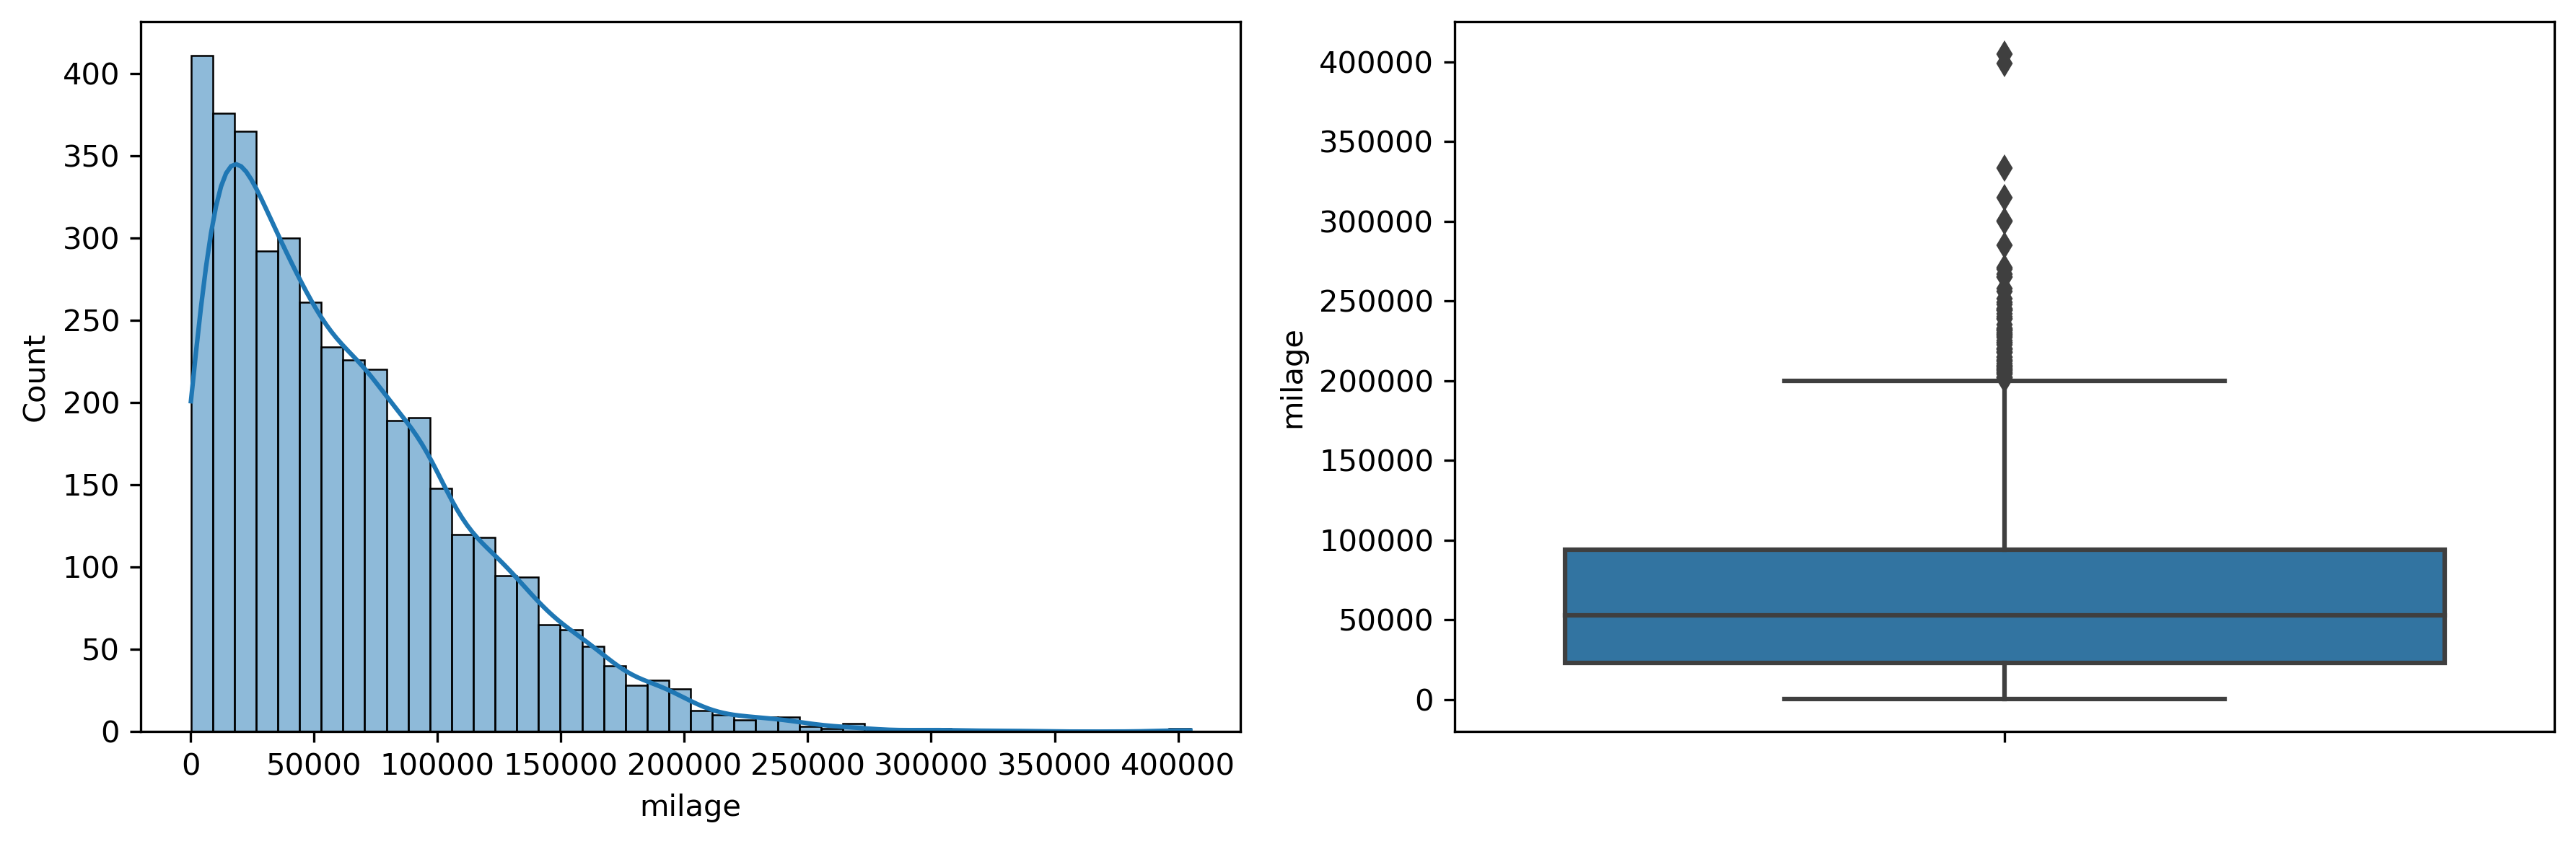

In [17]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='milage',data=df,kde=True,ax=axis[0])
sns.boxplot(y='milage',data=df,ax=axis[1])
plt.tight_layout()

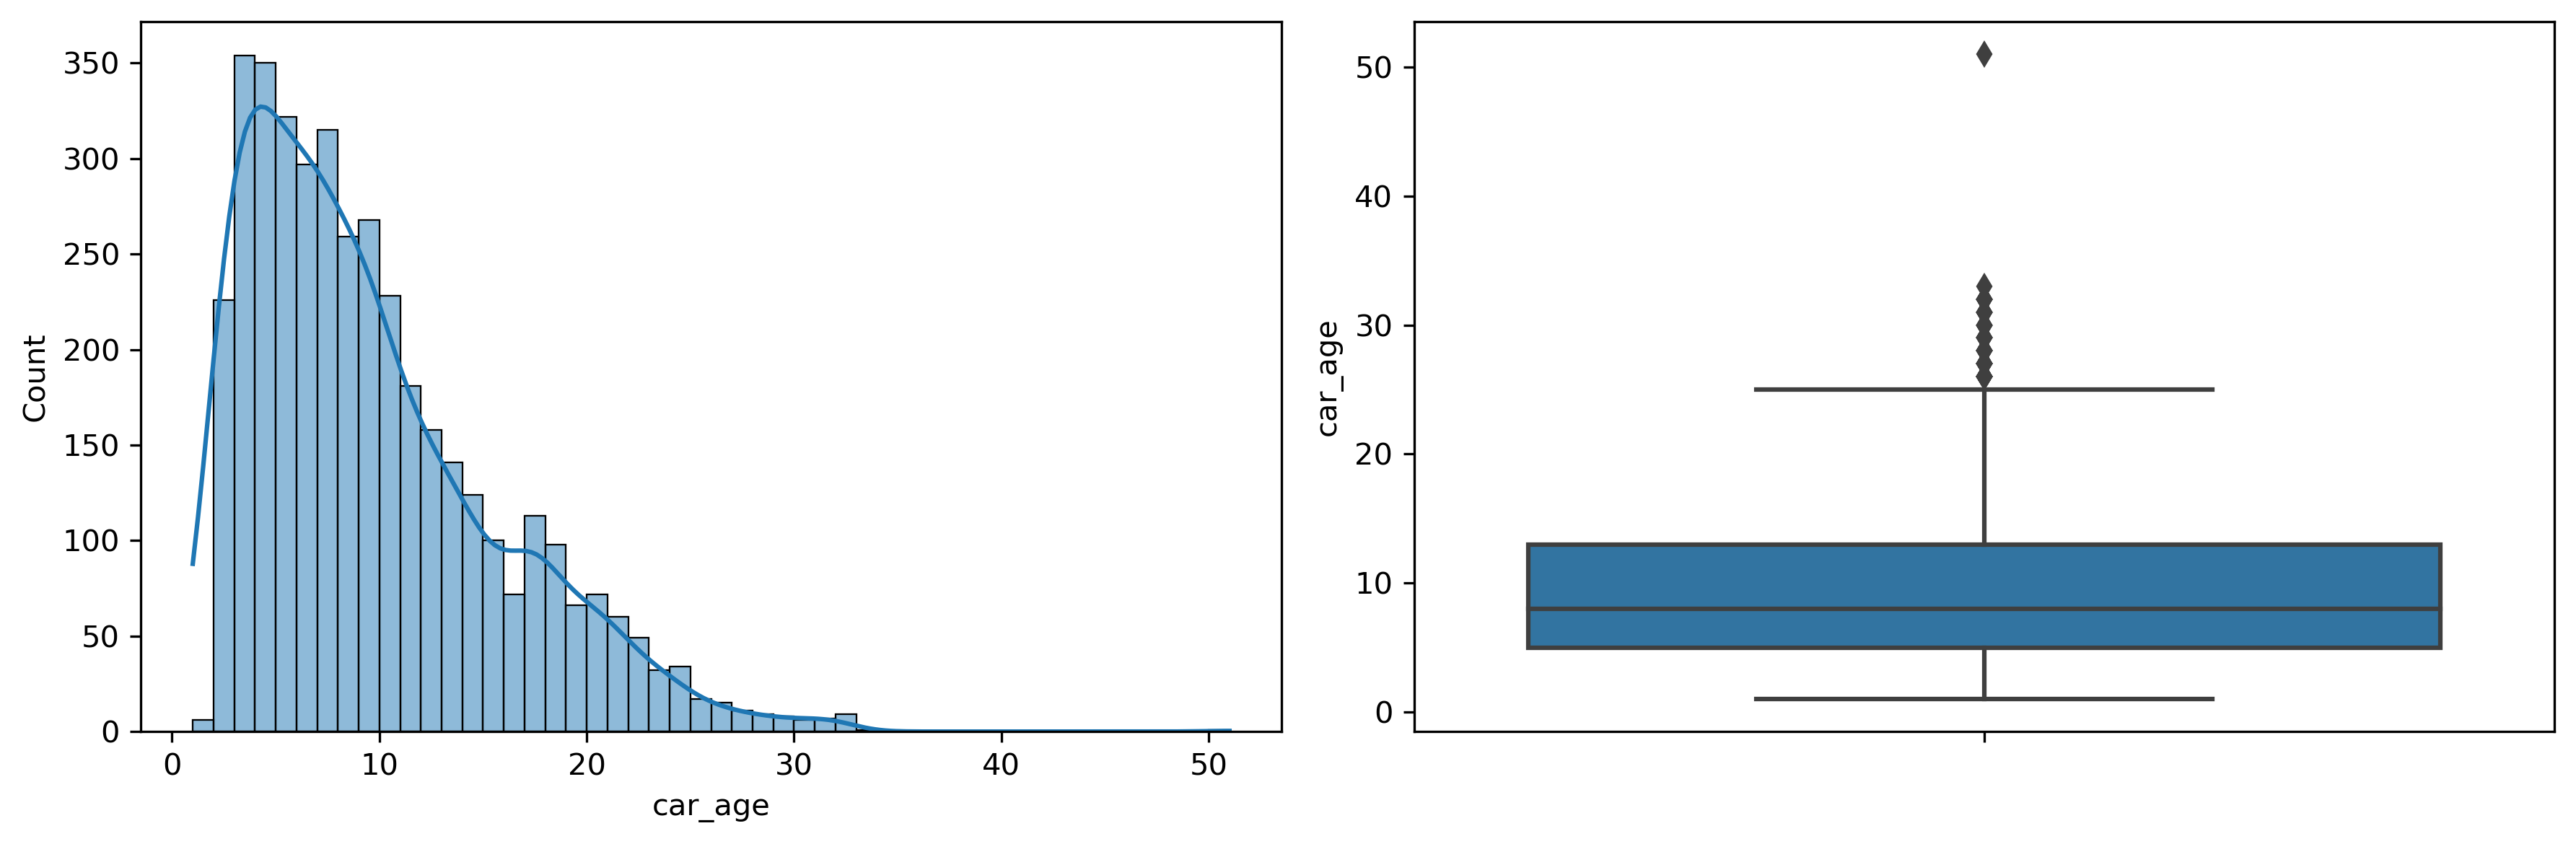

In [18]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='car_age',data=df,kde=True,ax=axis[0])
sns.boxplot(y='car_age',data=df,ax=axis[1])
plt.tight_layout()

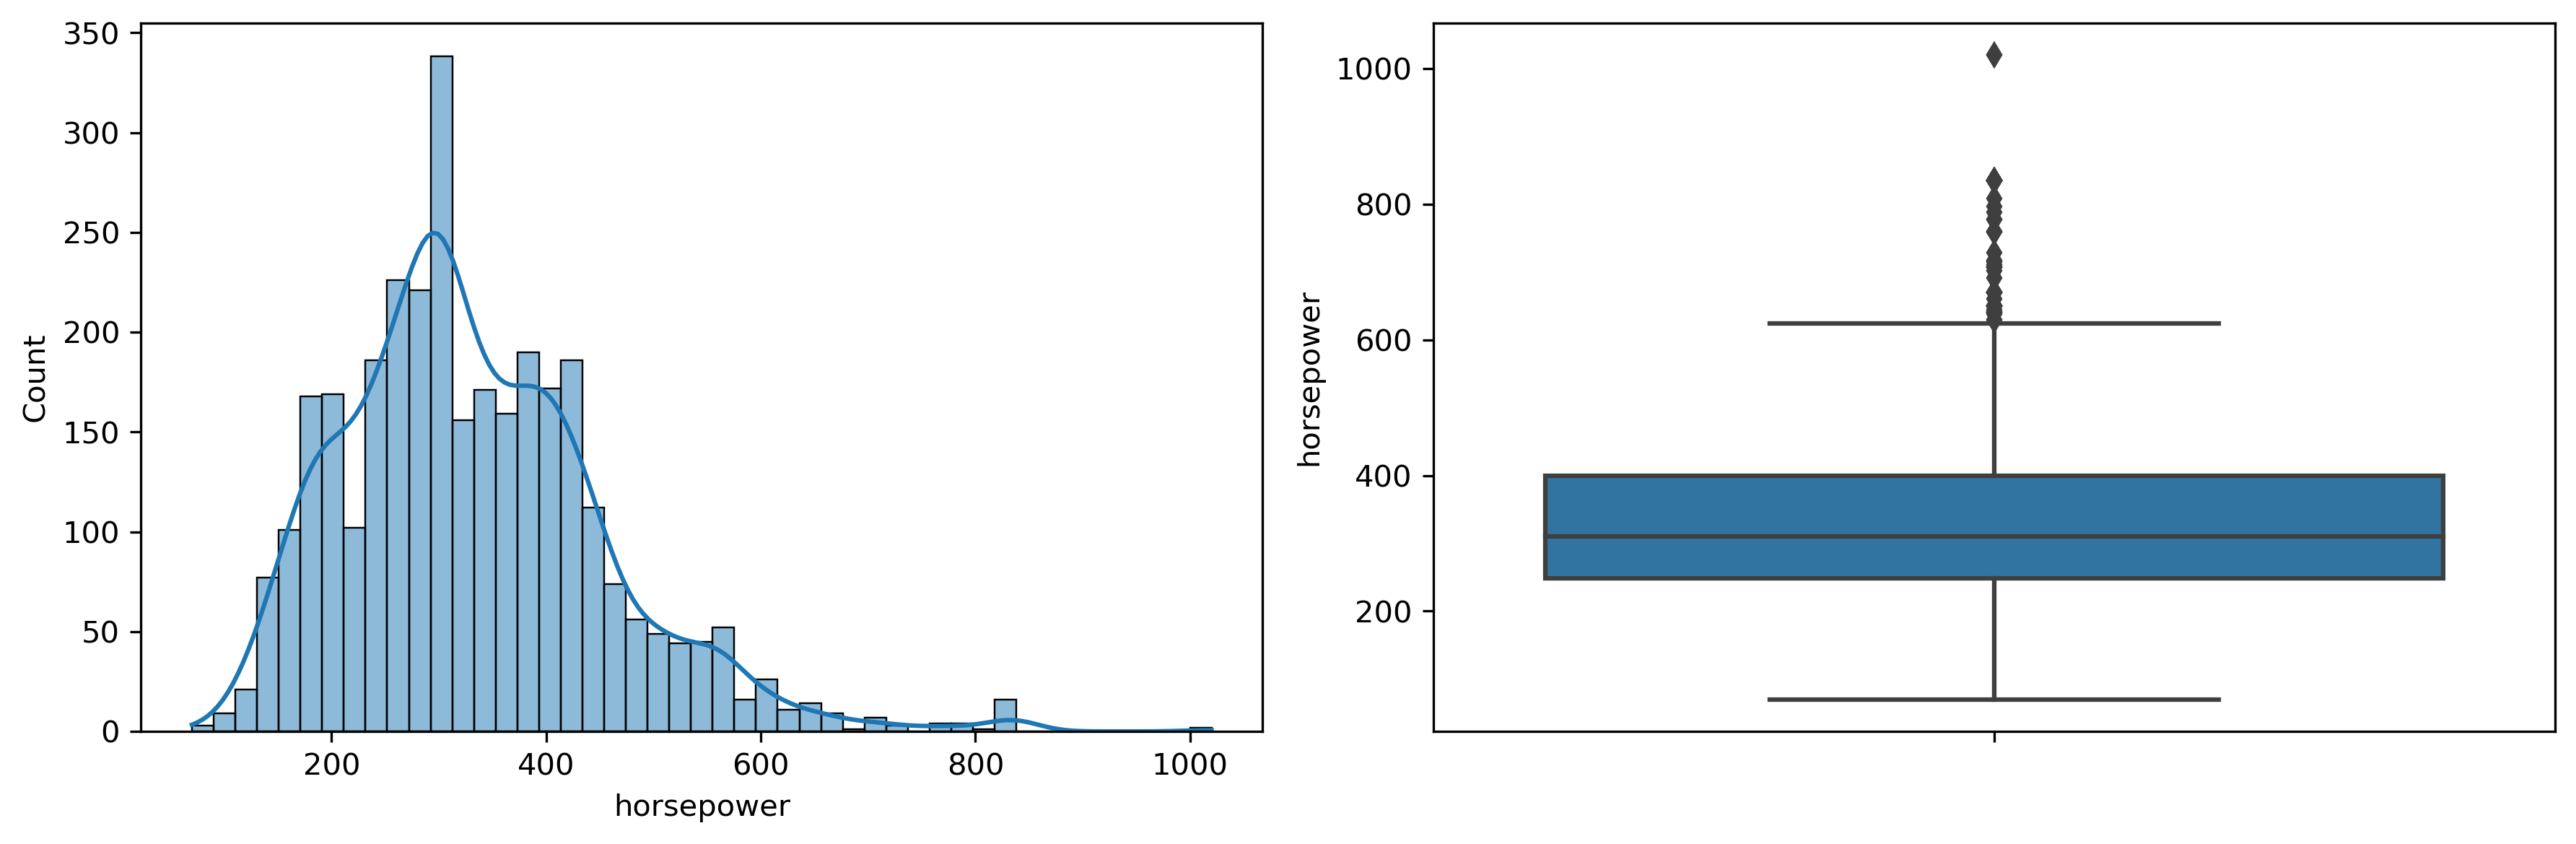

In [19]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='horsepower',data=df,kde=True,ax=axis[0])
sns.boxplot(y='horsepower',data=df,ax=axis[1])
plt.tight_layout()

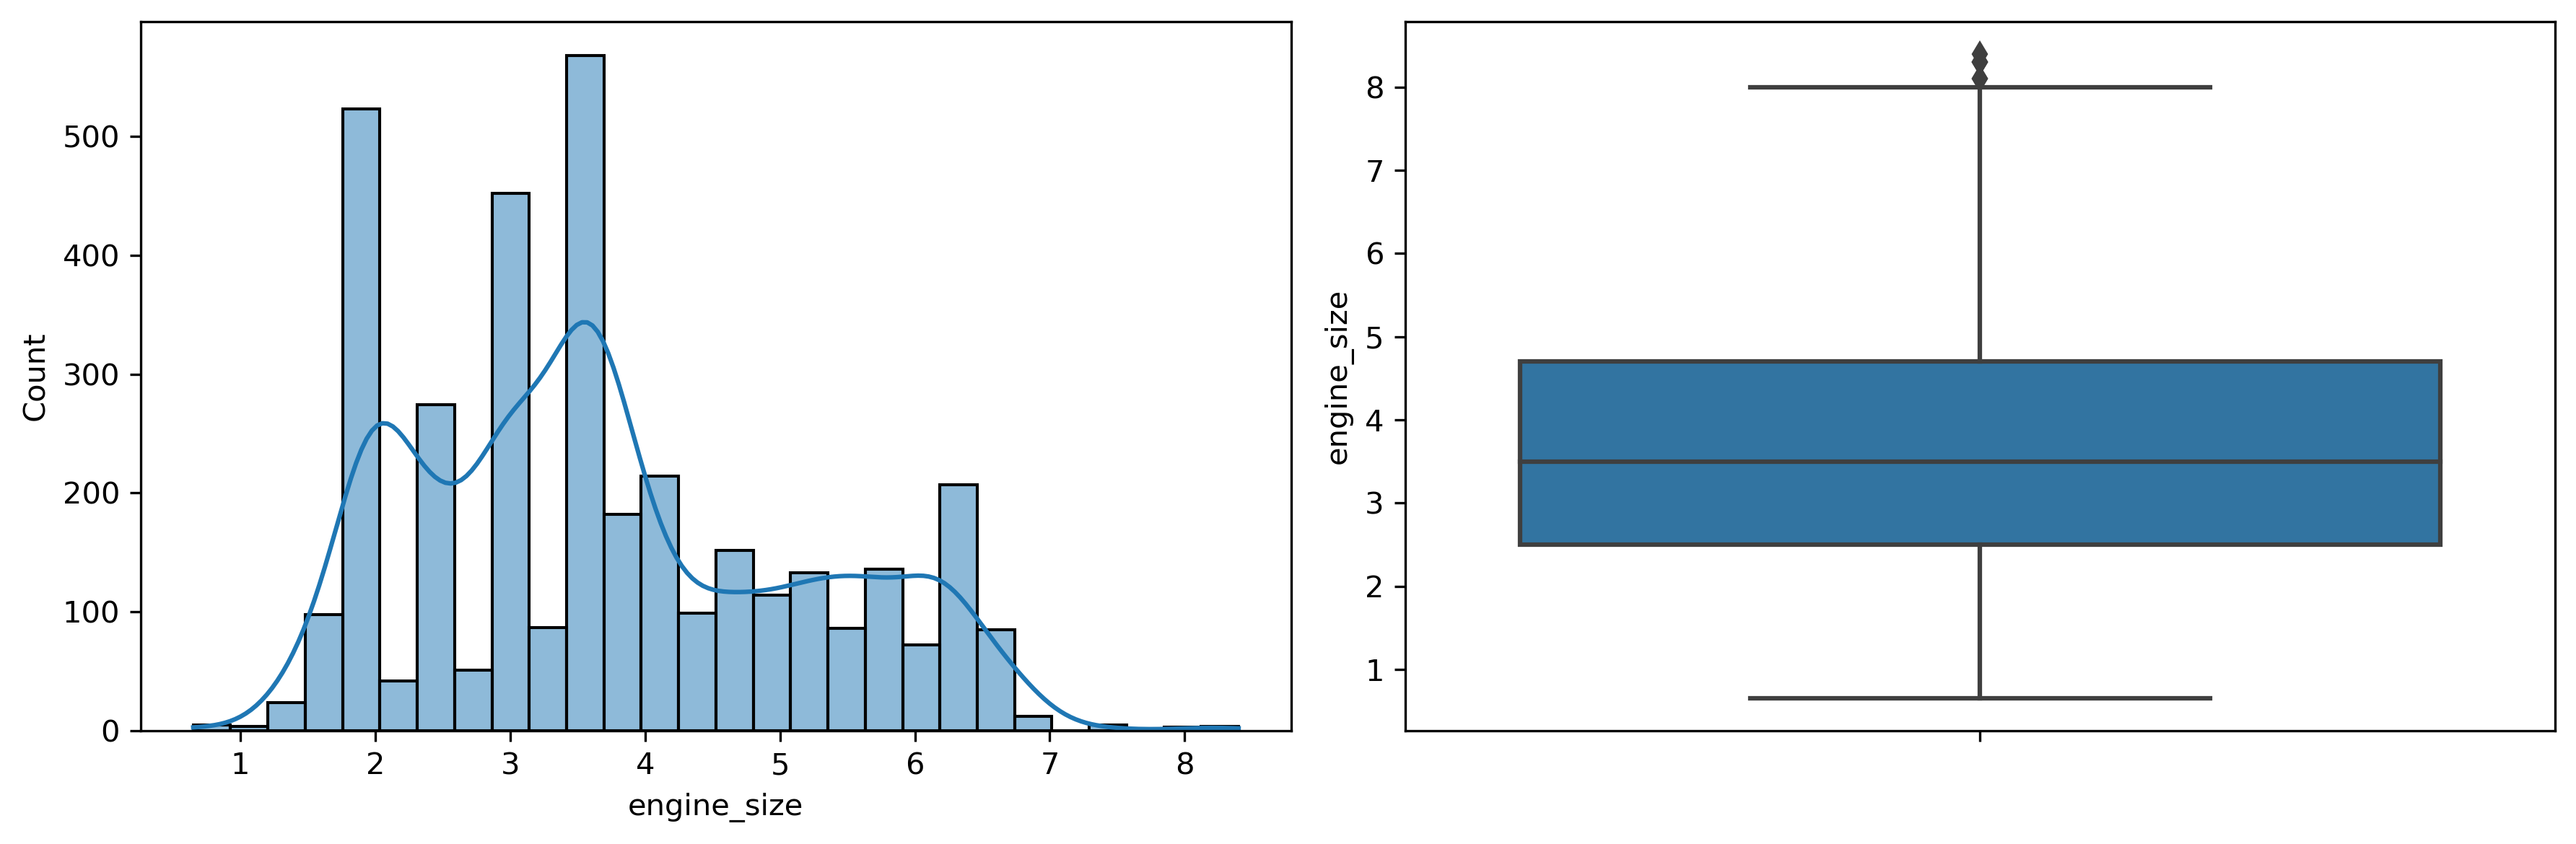

In [20]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='engine_size',data=df,kde=True,ax=axis[0])
sns.boxplot(y='engine_size',data=df,ax=axis[1])
plt.tight_layout()

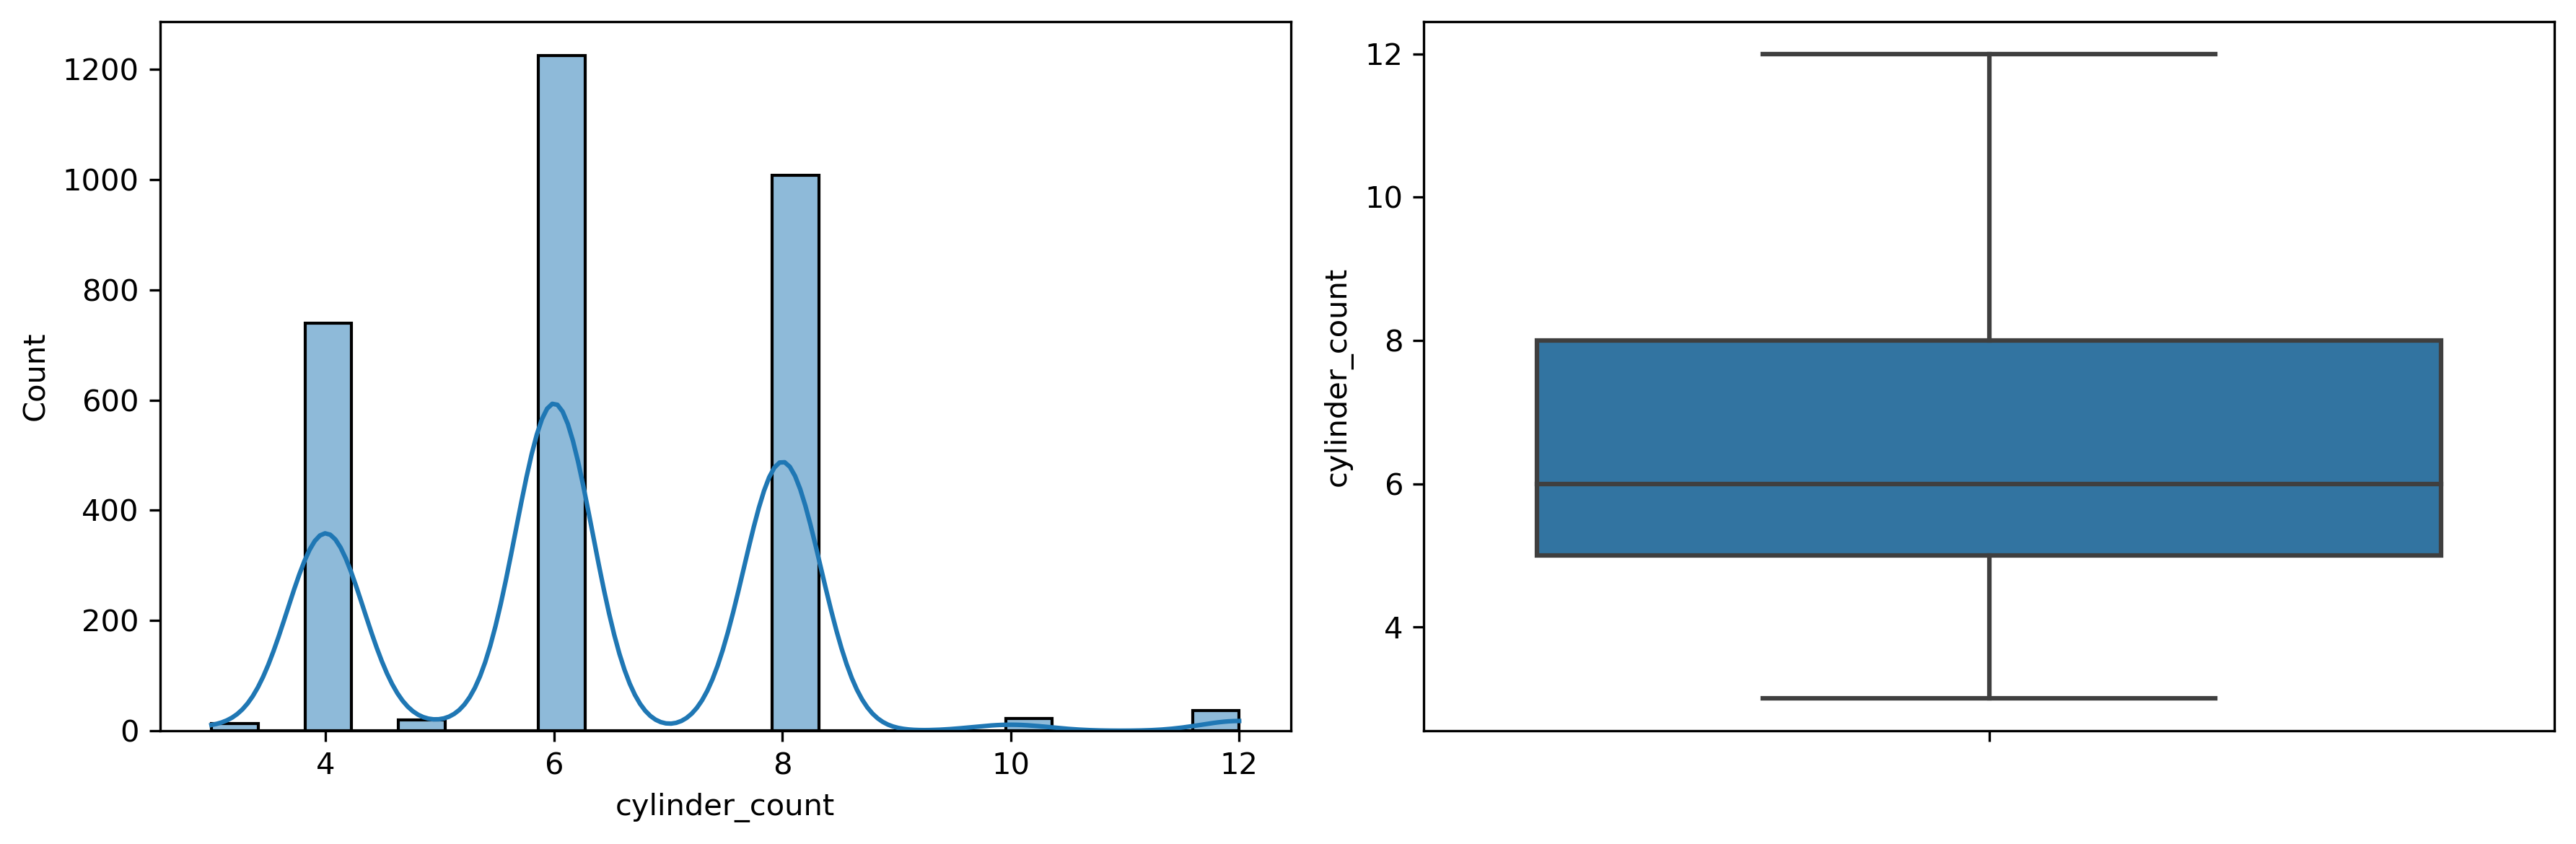

In [21]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='cylinder_count',data=df,kde=True,ax=axis[0])
sns.boxplot(y='cylinder_count',data=df,ax=axis[1])
plt.tight_layout()

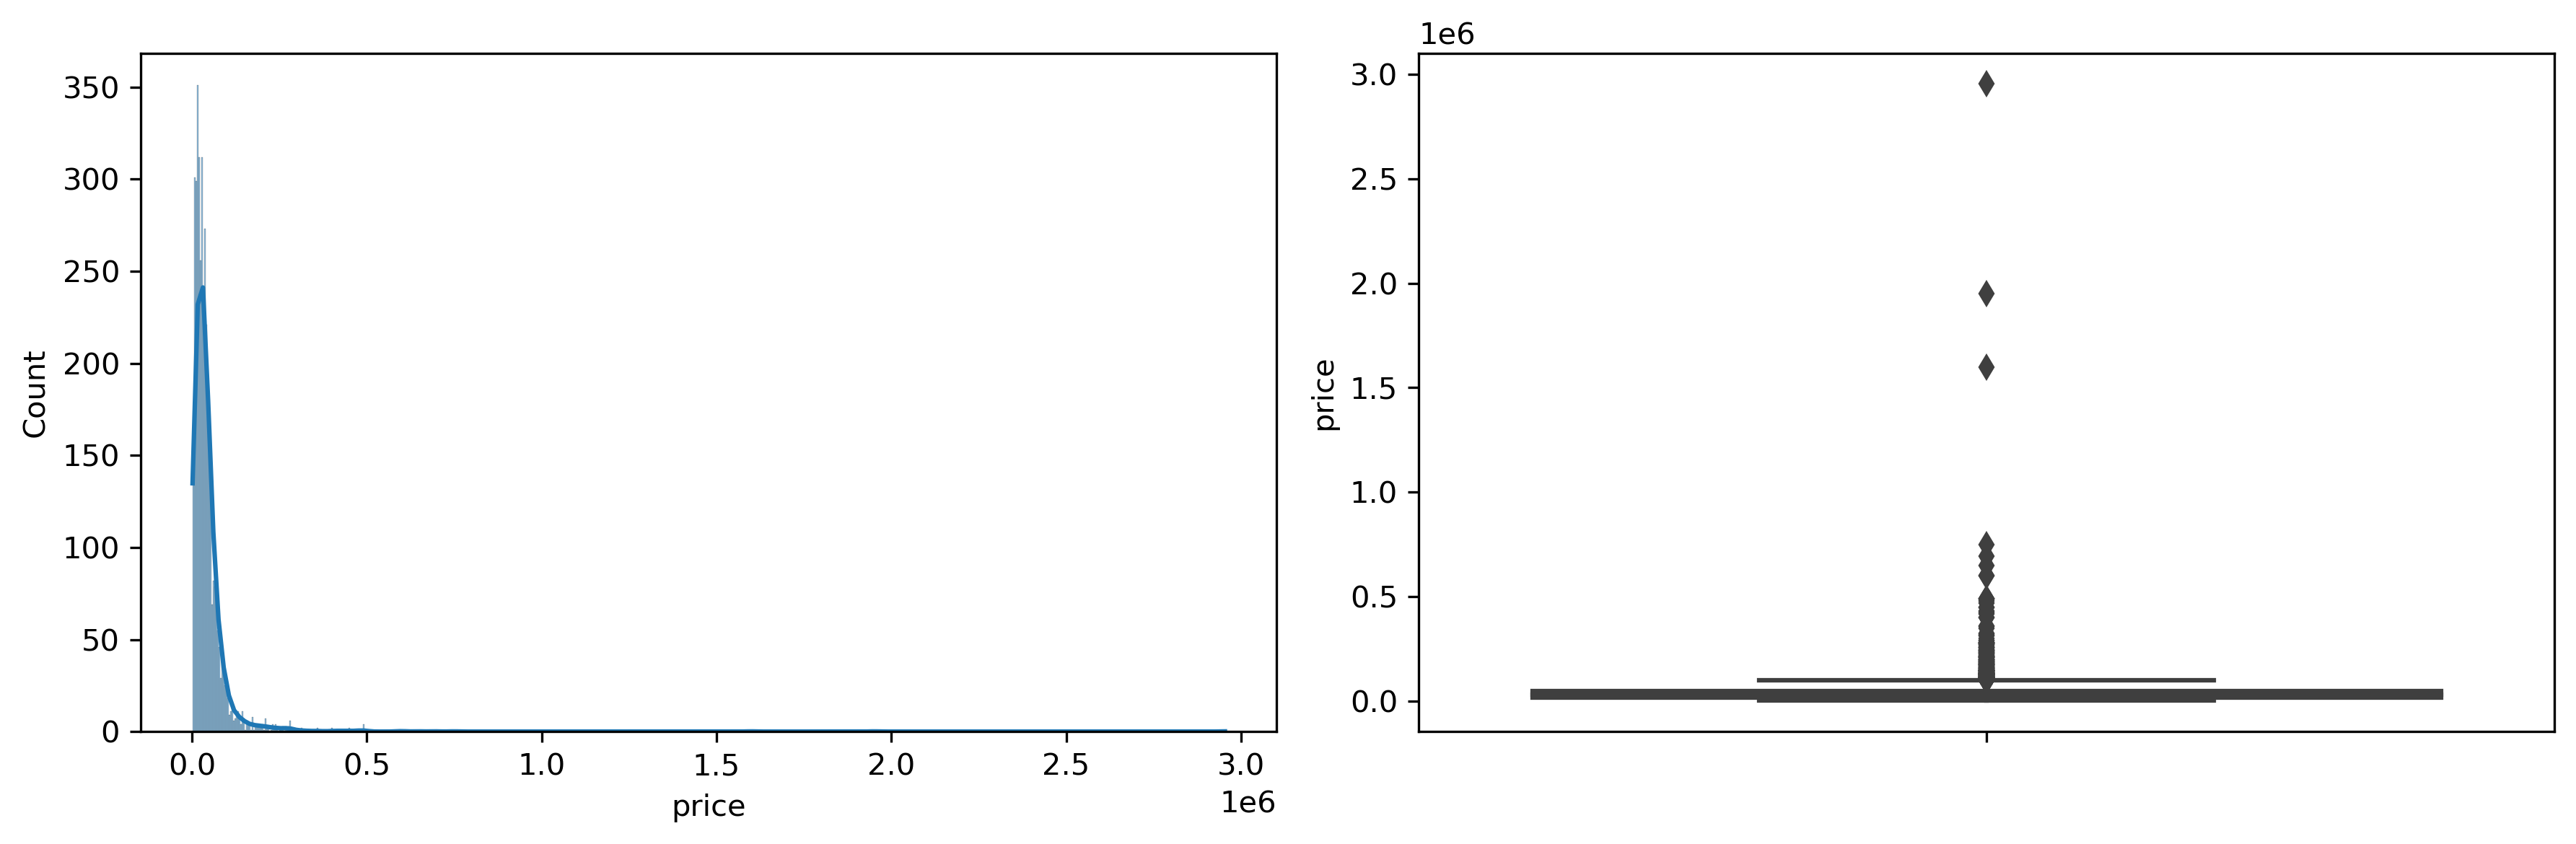

In [22]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='price',data=df,kde=True,ax=axis[0])
sns.boxplot(y='price',data=df,ax=axis[1])
plt.tight_layout()

In [23]:
threshold = 0.5e6
df = df[df['price']<threshold]
df.reset_index(drop=True,inplace=True)
# df.drop('Index',axis=1,inplace=True)

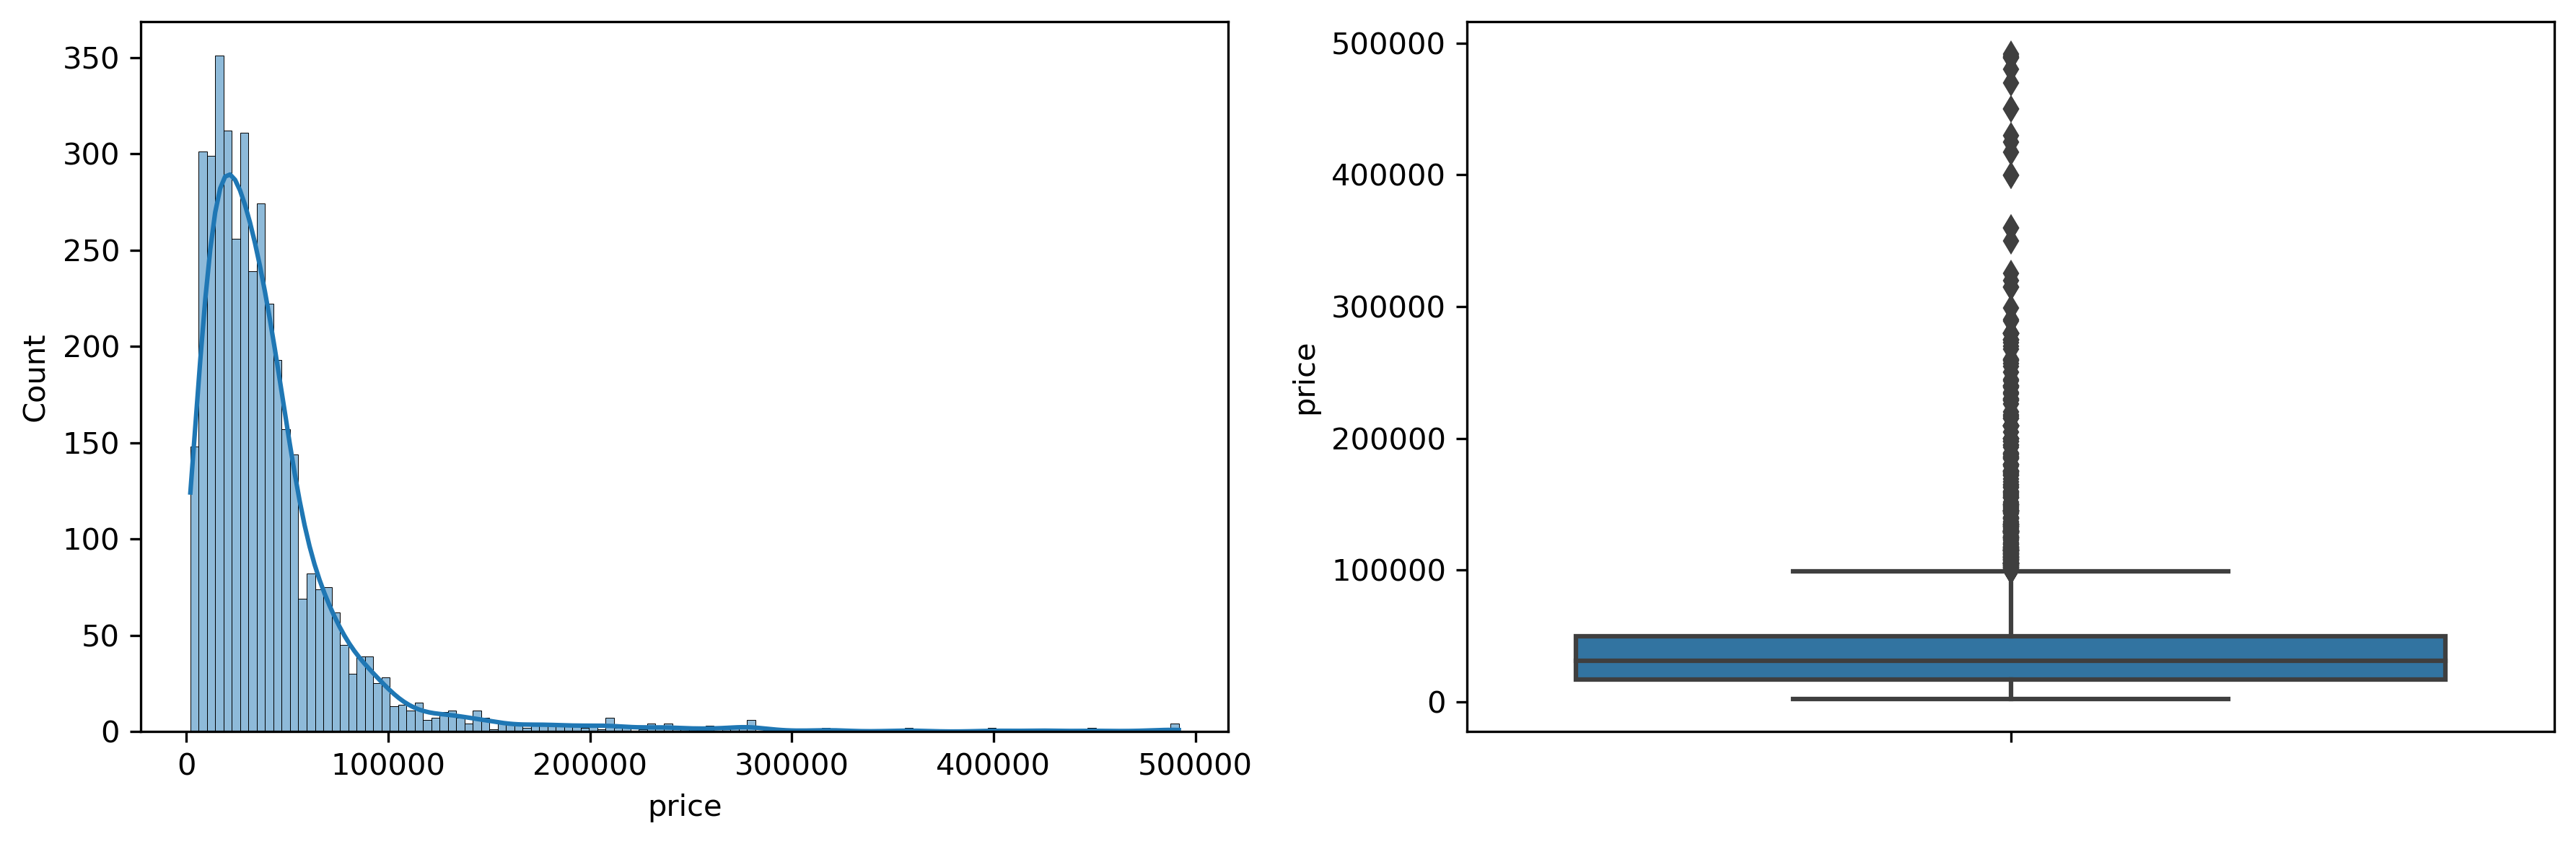

In [24]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(12,4),dpi=300)
sns.histplot(x='price',data=df,kde=True,ax=axis[0])
sns.boxplot(y='price',data=df,ax=axis[1])
plt.tight_layout()

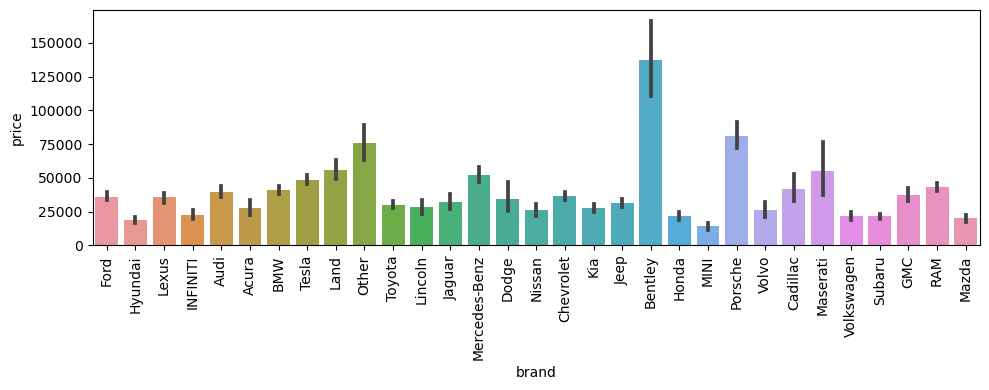

In [25]:
plt.figure(figsize=(10,4),layout='tight')
sns.barplot(x='brand',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

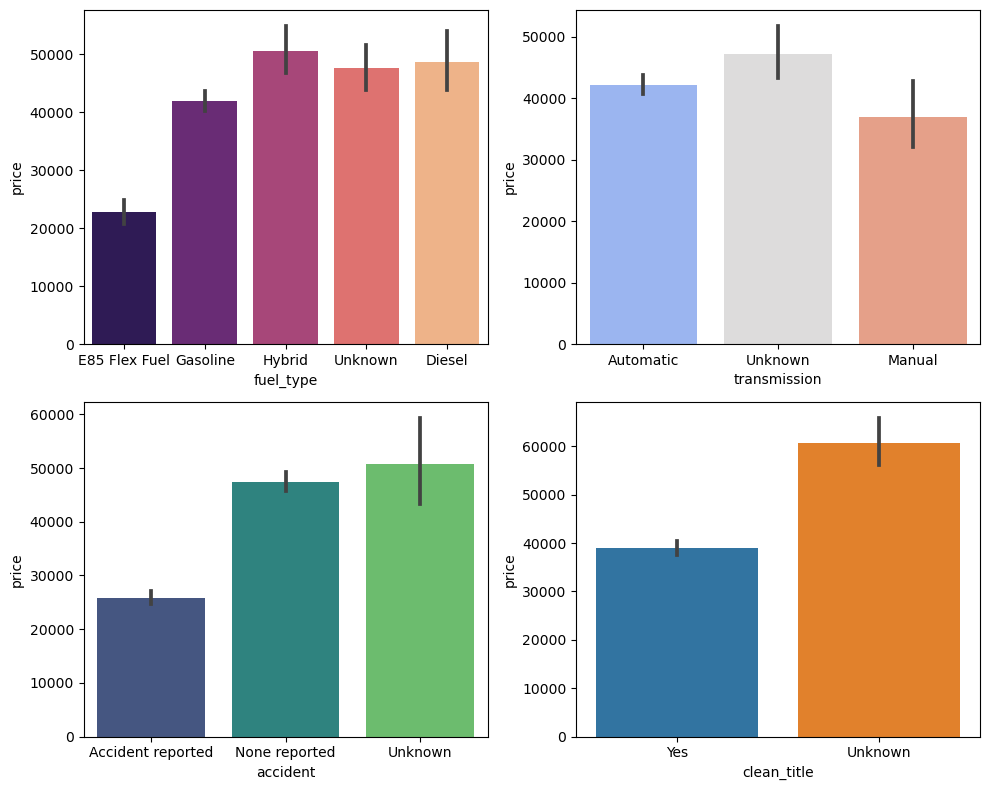

In [26]:
fig, axis = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.barplot(x='fuel_type',y='price',data=df,ax=axis[0][0],palette='magma')
sns.barplot(x='transmission',y='price',data=df,ax=axis[0][1],palette='coolwarm')
sns.barplot(x='accident',y='price',data=df,ax=axis[1][0],palette='viridis')
sns.barplot(x='clean_title',y='price',data=df,ax=axis[1][1])
plt.tight_layout()

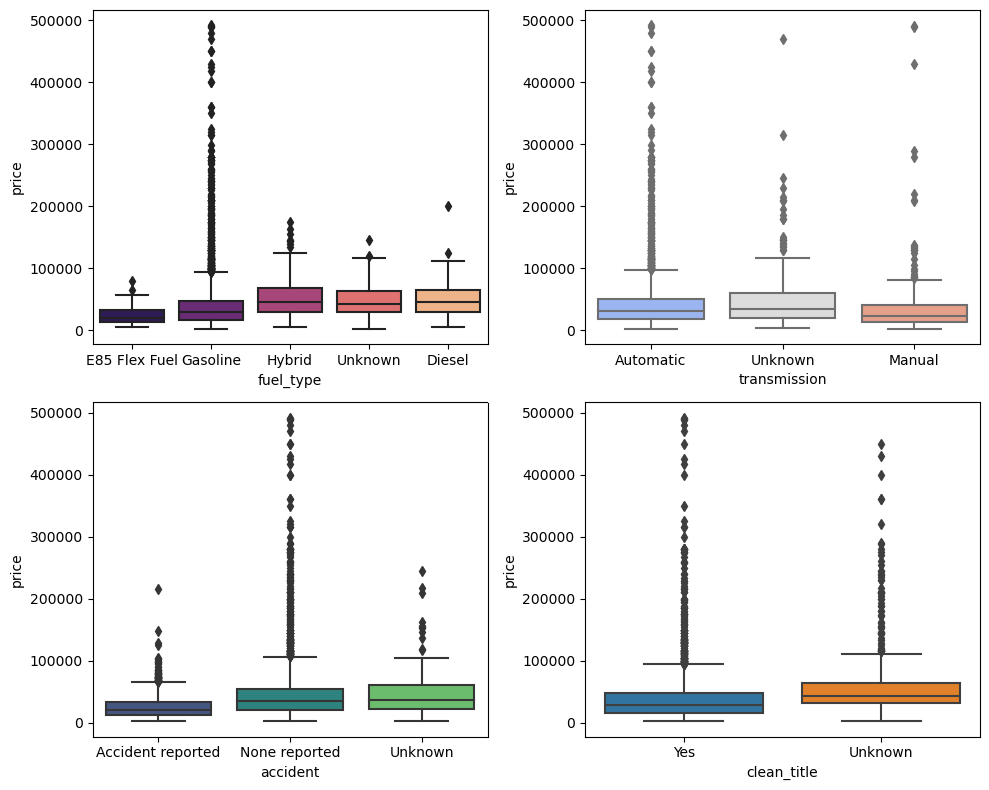

In [27]:
fig, axis = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.boxplot(x='fuel_type',y='price',data=df,ax=axis[0][0],palette='magma')
sns.boxplot(x='transmission',y='price',data=df,ax=axis[0][1],palette='coolwarm')
sns.boxplot(x='accident',y='price',data=df,ax=axis[1][0],palette='viridis')
sns.boxplot(x='clean_title',y='price',data=df,ax=axis[1][1])
plt.tight_layout()

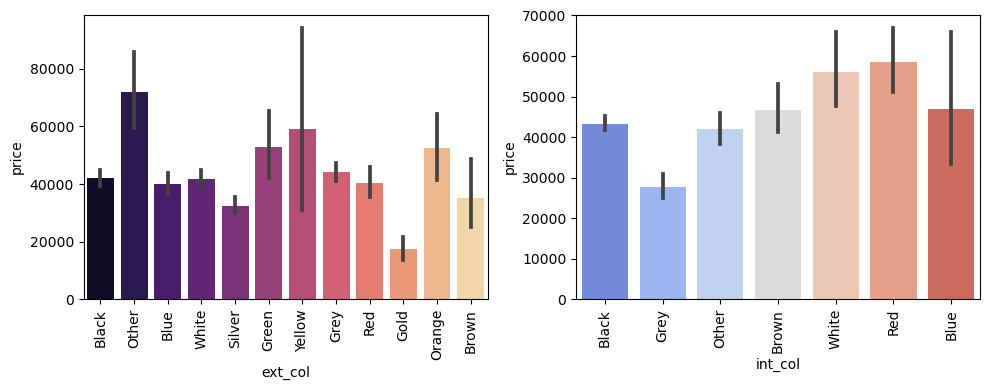

In [28]:
fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.barplot(x='ext_col',y='price',data=df,ax=axis[0],palette='magma')
sns.barplot(x='int_col',y='price',data=df,ax=axis[1],palette='coolwarm')
axis[0].tick_params(axis='x', rotation=90)
axis[1].tick_params(axis='x', rotation=90)
plt.tight_layout()

C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x960 with 0 Axes>

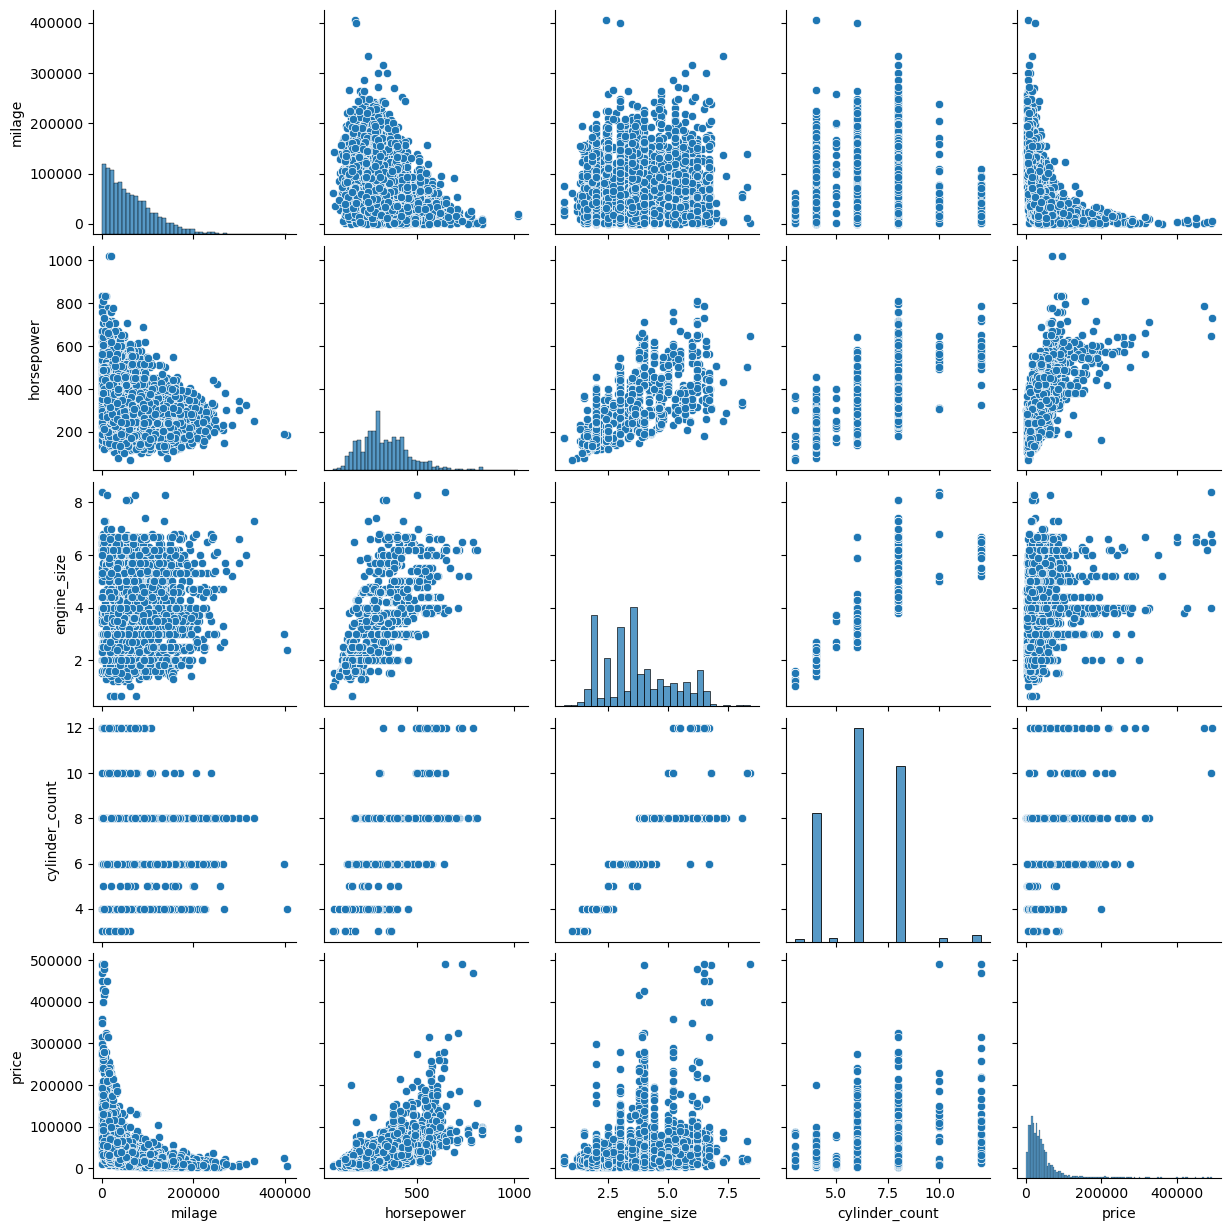

In [29]:
plt.figure(dpi=200,layout='tight')
sns.pairplot(df[['milage','horsepower','engine_size','cylinder_count','price']])

<Axes: >

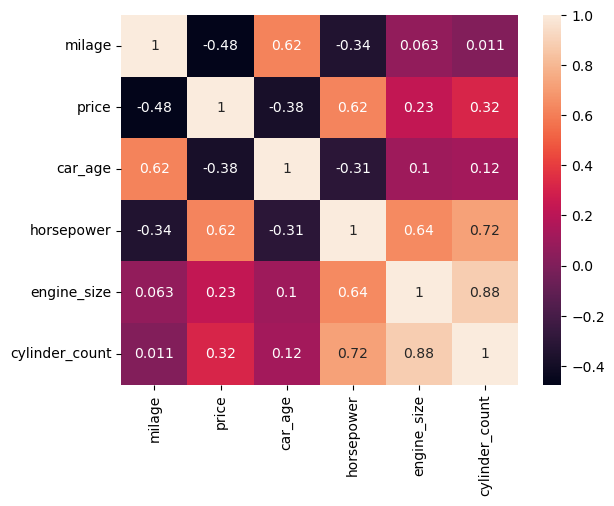

In [30]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [31]:
df.to_csv('../data/ready_to_transform_car_data.csv',index=False)